In [1]:
#pip install seaborn
# !pip install openpyxl

In [2]:
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sb
from sklearn.preprocessing import MinMaxScaler
import os
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt
# from sklearn.pipeline import Pipeline


In [3]:
# for dirname, _, filenames in os.walk(r'..\data'):
#     dir_name=dirname
dir_name="data"

In [4]:
# dir_name=os.path.join('../','data_1')

# Reading Data files


In [5]:
df_1=pd.read_excel(os.path.join(dir_name,'cl_sell_buy.xlsx'),engine='openpyxl',)
df_2=pd.read_excel(os.path.join(dir_name,'diffs.xlsx'),engine='openpyxl',)  
df_3=pd.read_excel(os.path.join(dir_name,'margins.xlsx'),engine='openpyxl',)

In [6]:
def delete_cols(date_list, del_list):
    for name in df_lag.columns:
            if 't-' in name or name in date_list or name=='target_position':
                pass
            else:
                del df_lag[name]
            for str_value in del_list:
                if str_value in name:
                    del df_lag[name]
                    

In [7]:
def normalize_df(df):
    # copy the data
    df_min_max_scaled = df.copy()

    # apply normalization techniques
    for column in df_min_max_scaled.columns:
        df_min_max_scaled[column] = (df_min_max_scaled[column] - df_min_max_scaled[column].min()) / (df_min_max_scaled[column].max() - df_min_max_scaled[column].min())    

    # view normalized data
    return(df_min_max_scaled)

In [8]:
class MultiColumnLabelEncoder:
    def __init__(self,columns = None):
        self.columns = columns # array of column names to encode

    def fit(self,X,y=None):
        return self # not relevant here

    def transform(self,X):
        '''
        Transforms columns of X specified in self.columns using
        LabelEncoder(). If no columns specified, transforms all
        columns in X.
        '''
        output = X.copy()
        if self.columns is not None:
            for col in self.columns:
                output[col] = LabelEncoder().fit_transform(output[col])
        else:
            for colname,col in output.iteritems():
                output[colname] = LabelEncoder().fit_transform(col)
        return output

    def fit_transform(self,X,y=None):
        return self.fit(X,y).transform(X)

In [9]:
start_date = '2015-01-10'

In [10]:
mask = (df_1['date'] > start_date)
df_1 = df_1.loc[mask]
df_1.dropna(axis=0, inplace=True)


In [11]:
df_1.head()

,date,time_spread,dod_change,target_position
1015,2015-01-12,-0.69,-6.000000e-02,SHORT
1016,2015-01-13,-0.62,7.000000e-02,LONG
1017,2015-01-14,-0.48,1.400000e-01,LONG
1018,2015-01-15,-0.48,7.993606e-15,LONG
1019,2015-01-16,-0.44,4.000000e-02,LONG


In [12]:
df_2.head()


,ObservationDate,MEH-WTI,MID,LLS
0,2015-10-01,0.25,-0.20,2.25
1,2015-10-02,-0.40,-0.20,1.80
2,2015-10-05,-0.45,-0.25,1.60
3,2015-10-06,0.10,-0.20,1.65
4,2015-10-07,0.00,-0.05,2.00


In [13]:
mask = (df_2['ObservationDate'] > start_date)
df_2 = df_2.loc[mask]
df_2.dropna(axis=0, inplace=True)

In [14]:
df_2.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 1394 entries, 0 to 1393
Data columns (total 4 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   ObservationDate  1394 non-null   datetime64[ns]
 1   MEH-WTI          1394 non-null   float64       
 2   MID              1394 non-null   float64       
 3   LLS              1394 non-null   float64       
dtypes: datetime64[ns](1), float64(3)
memory usage: 54.5 KB


In [15]:
df_3.head()


,DateCalculated,MEH | USGC | HSK,MEH | USGC | FCC,WTI | P2 | FCC,WTI | P2 | HSK
0,2017-01-03,3.76,3.00,9.71,8.90
1,2017-01-04,3.47,2.67,9.37,8.60
2,2017-01-05,3.43,2.55,9.06,8.39
3,2017-01-06,3.09,2.12,8.59,7.97
4,2017-01-09,3.07,2.23,8.75,8.01


In [16]:
mask = (df_3['DateCalculated'] > start_date)
df_3 = df_3.loc[mask]
df_3.dropna(axis=0, inplace=True)
df_3.describe()

,MEH | USGC | HSK,MEH | USGC | FCC,WTI | P2 | FCC,WTI | P2 | HSK
count,1128.000000,1128.000000,1128.000000,1128.000000
mean,2.049770,0.426383,7.744574,8.144761
std,1.812561,1.935983,3.578700,3.454049
min,-4.110000,-5.820000,-1.440000,1.120000
25%,0.840000,-1.030000,5.217500,5.515000
50%,2.060000,0.340000,8.210000,8.240000
75%,3.122500,1.590000,10.190000,10.592500
max,15.800000,13.920000,57.660000,59.370000


In [17]:
df1_df2=pd.merge(
    df_1,
    df_2,
    left_on=['date'],
    right_on=['ObservationDate']
)

In [18]:
combined_df=pd.merge(
    df1_df2,
    df_3,
    left_on=['date'],
    right_on=['DateCalculated']
)


<AxesSubplot:>

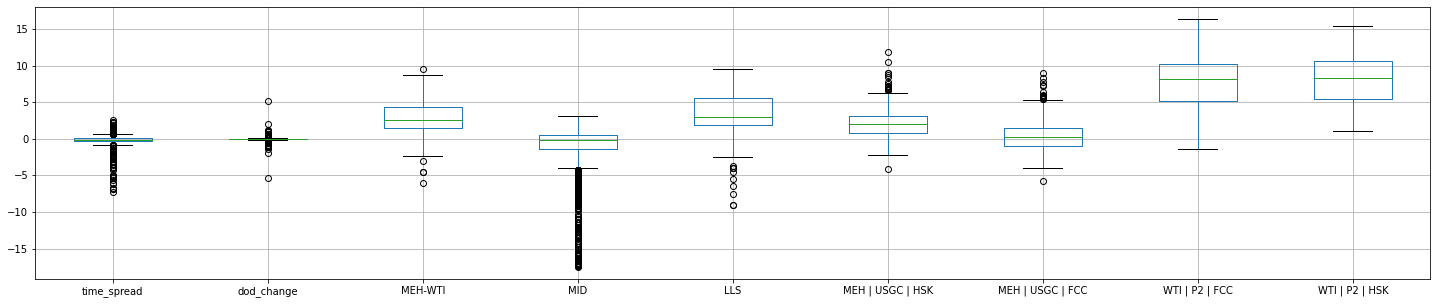

In [19]:
combined_df.boxplot(figsize=(25,5))

array([[<AxesSubplot:title={'center':'dod_change'}>,
        <AxesSubplot:title={'center':'time_spread'}>],
       [<AxesSubplot:title={'center':'MEH-WTI'}>,
        <AxesSubplot:title={'center':'MID'}>]], dtype=object)

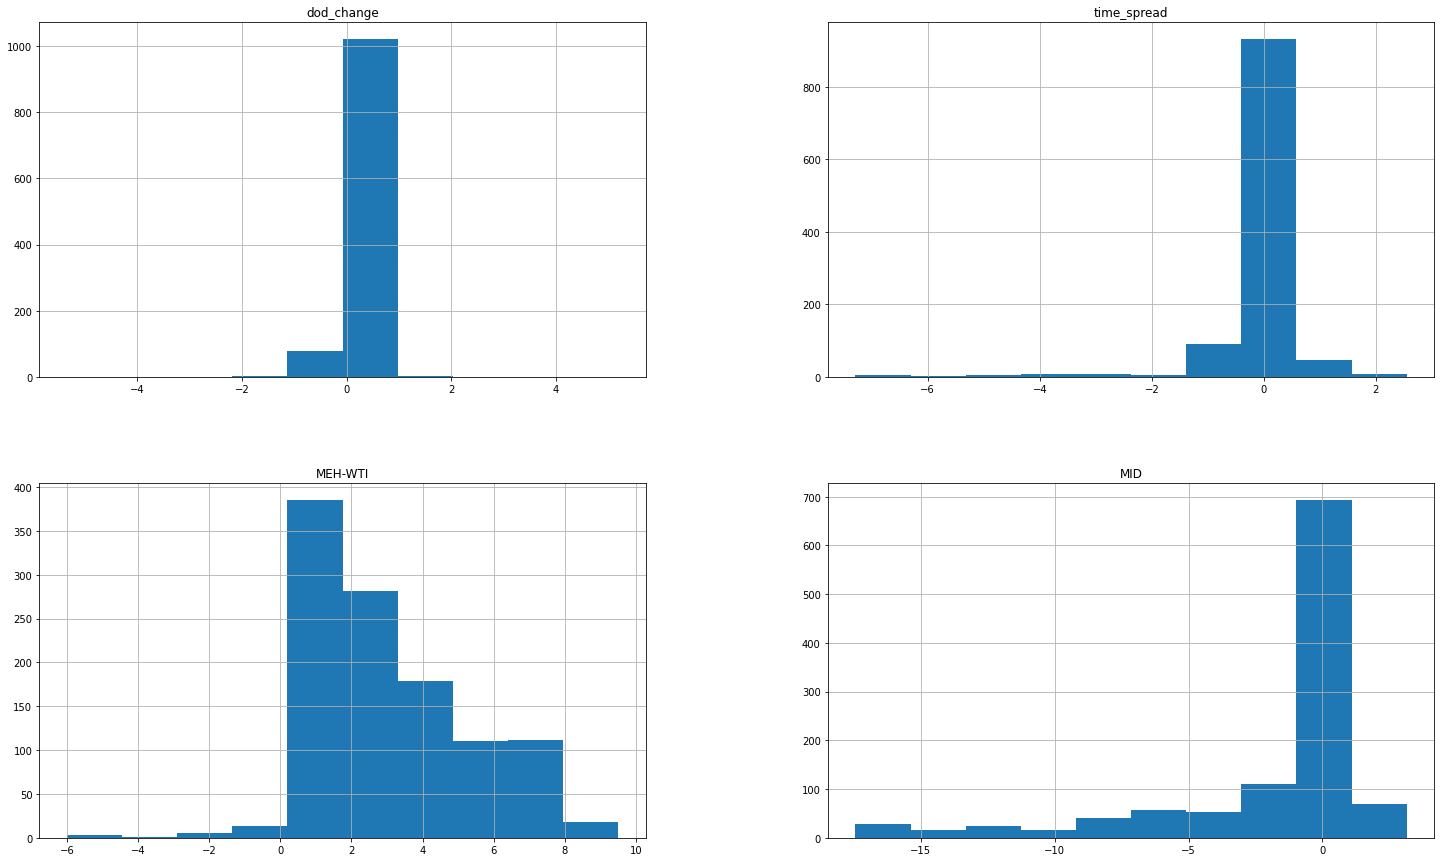

In [20]:
# combined_df.hist(column='dod_change')
combined_df.hist(column=["dod_change", "time_spread",'MEH-WTI','MID' ],figsize=(25,15))



In [21]:
combined_df.describe()

,time_spread,dod_change,MEH-WTI,MID,LLS,MEH | USGC | HSK,MEH | USGC | FCC,WTI | P2 | FCC,WTI | P2 | HSK
count,1108.000000,1108.000000,1108.000000,1108.000000,1108.000000,1108.000000,1108.000000,1108.000000,1108.000000
mean,-0.173962,0.001543,3.039034,-1.807626,3.690839,2.025063,0.388610,7.692671,8.107040
std,0.811995,0.284721,2.210398,4.136957,2.519065,1.768685,1.892678,3.271980,3.117824
min,-7.290000,-5.350000,-6.000000,-17.450000,-9.000000,-4.110000,-5.820000,-1.440000,1.120000
25%,-0.280000,-0.030000,1.450000,-1.412500,1.900000,0.820000,-1.042500,5.192500,5.490000
50%,-0.130000,0.000000,2.600000,-0.150000,3.000000,2.025000,0.270000,8.160000,8.260000
75%,0.080000,0.030000,4.350000,0.450000,5.600000,3.120000,1.520000,10.212500,10.607500
max,2.550000,5.200000,9.500000,3.150000,9.500000,11.820000,8.930000,16.290000,15.350000


In [22]:
combined_df[combined_df.dod_change< 0].count()

date                525
time_spread         525
dod_change          525
target_position     525
ObservationDate     525
MEH-WTI             525
MID                 525
LLS                 525
DateCalculated      525
MEH | USGC | HSK    525
MEH | USGC | FCC    525
WTI | P2 | FCC      525
WTI | P2 | HSK      525
dtype: int64

In [23]:
combined_df['year'] = pd.DatetimeIndex(combined_df['date']).year
combined_df['month'] = pd.DatetimeIndex(combined_df['date']).month
combined_df['month_day'] = pd.DatetimeIndex(combined_df['date']).day
combined_df['weekday'] = pd.DatetimeIndex(combined_df['date']).weekday   # Monday is 0 and Sunday is 6

In [24]:
combined_df=combined_df.drop(columns=['date','ObservationDate','DateCalculated'])

In [25]:
type(combined_df.columns)

pandas.core.indexes.base.Index

In [26]:
lags = range(1, 21)  # 5 lags

df_lag=combined_df.assign(**{'{} (t-{})'.format(col, t): combined_df[col].shift(t)
    for t in lags
    for col in combined_df
})

In [27]:
df_lag.head()

,time_spread,dod_change,target_position,MEH-WTI,MID,LLS,MEH | USGC | HSK,MEH | USGC | FCC,WTI | P2 | FCC,WTI | P2 | HSK,...,MID (t-20),LLS (t-20),MEH | USGC | HSK (t-20),MEH | USGC | FCC (t-20),WTI | P2 | FCC (t-20),WTI | P2 | HSK (t-20),year (t-20),month (t-20),month_day (t-20),weekday (t-20)
0,-0.88,0.03,LONG,1.70,0.75,1.6,3.19,2.51,9.24,8.33,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,-0.81,0.07,LONG,1.70,0.80,1.6,3.29,2.61,9.37,8.46,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,-0.83,-0.02,SHORT,1.50,0.70,1.5,3.52,2.76,9.33,8.50,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,-0.78,0.05,LONG,1.55,0.65,1.4,3.58,2.87,9.49,8.61,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,-0.78,0.00,LONG,1.75,0.75,1.4,3.04,2.28,9.09,8.26,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [28]:
print (df_lag.columns)

Index(['time_spread', 'dod_change', 'target_position', 'MEH-WTI', 'MID', 'LLS',
       'MEH | USGC | HSK', 'MEH | USGC | FCC', 'WTI | P2 | FCC',
       'WTI | P2 | HSK',
       ...
       'MID (t-20)', 'LLS (t-20)', 'MEH | USGC | HSK (t-20)',
       'MEH | USGC | FCC (t-20)', 'WTI | P2 | FCC (t-20)',
       'WTI | P2 | HSK (t-20)', 'year (t-20)', 'month (t-20)',
       'month_day (t-20)', 'weekday (t-20)'],
      dtype='object', length=294)


In [29]:
df_lag.dropna(inplace=True)

In [30]:
df_lag.head()

,time_spread,dod_change,target_position,MEH-WTI,MID,LLS,MEH | USGC | HSK,MEH | USGC | FCC,WTI | P2 | FCC,WTI | P2 | HSK,...,MID (t-20),LLS (t-20),MEH | USGC | HSK (t-20),MEH | USGC | FCC (t-20),WTI | P2 | FCC (t-20),WTI | P2 | HSK (t-20),year (t-20),month (t-20),month_day (t-20),weekday (t-20)
20,-0.38,0.01,LONG,1.60,-0.3,1.80,2.12,1.45,8.17,7.36,...,0.75,1.6,3.19,2.51,9.24,8.33,2017.0,1.0,10.0,1.0
21,-0.27,0.11,LONG,1.35,-0.5,1.75,1.15,0.27,1.72,1.96,...,0.80,1.6,3.29,2.61,9.37,8.46,2017.0,1.0,11.0,2.0
22,-0.34,-0.07,SHORT,1.20,-0.5,1.85,2.05,1.36,8.70,7.53,...,0.70,1.5,3.52,2.76,9.33,8.50,2017.0,1.0,12.0,3.0
23,-0.31,0.03,LONG,1.05,-0.7,1.75,2.06,1.30,8.29,7.18,...,0.65,1.4,3.58,2.87,9.49,8.61,2017.0,1.0,13.0,4.0
24,-0.33,-0.02,SHORT,1.40,-0.4,1.50,1.83,1.08,8.54,7.45,...,0.75,1.4,3.04,2.28,9.09,8.26,2017.0,1.0,17.0,1.0


In [31]:
df_lag.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1088 entries, 20 to 1107
Columns: 294 entries, time_spread to weekday (t-20)
dtypes: float64(269), int64(4), object(21)
memory usage: 2.4+ MB


In [32]:
dates_list=['year','month','weekday','month_day']
del_str=['year (t', 'month (t', 'weekday (t', 'month_day (t' ]

In [33]:
delete_cols(dates_list,del_str)

In [34]:
print(df_lag.isnull().sum())

target_position            0
year                       0
month                      0
month_day                  0
weekday                    0
                          ..
LLS (t-20)                 0
MEH | USGC | HSK (t-20)    0
MEH | USGC | FCC (t-20)    0
WTI | P2 | FCC (t-20)      0
WTI | P2 | HSK (t-20)      0
Length: 205, dtype: int64


In [35]:
df_lag.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1088 entries, 20 to 1107
Columns: 205 entries, target_position to WTI | P2 | HSK (t-20)
dtypes: float64(180), int64(4), object(21)
memory usage: 1.7+ MB


In [36]:
df = df_lag.dropna()

In [37]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1088 entries, 20 to 1107
Columns: 205 entries, target_position to WTI | P2 | HSK (t-20)
dtypes: float64(180), int64(4), object(21)
memory usage: 1.7+ MB


In [38]:
# df_input=df_lag.drop(columns='action',axis=1) # since these columns wer
# df_input=df_lag.copy()
# df_output=df_lag['action']

In [39]:
df_cat = df.select_dtypes(include=['object']).copy()

In [40]:
df_cat.head()

,target_position,target_position (t-1),target_position (t-2),target_position (t-3),target_position (t-4),target_position (t-5),target_position (t-6),target_position (t-7),target_position (t-8),target_position (t-9),...,target_position (t-11),target_position (t-12),target_position (t-13),target_position (t-14),target_position (t-15),target_position (t-16),target_position (t-17),target_position (t-18),target_position (t-19),target_position (t-20)
20,LONG,LONG,LONG,SHORT,SHORT,SHORT,LONG,SHORT,LONG,LONG,...,LONG,LONG,SHORT,LONG,SHORT,LONG,LONG,SHORT,LONG,LONG
21,LONG,LONG,LONG,LONG,SHORT,SHORT,SHORT,LONG,SHORT,LONG,...,LONG,LONG,LONG,SHORT,LONG,SHORT,LONG,LONG,SHORT,LONG
22,SHORT,LONG,LONG,LONG,LONG,SHORT,SHORT,SHORT,LONG,SHORT,...,LONG,LONG,LONG,LONG,SHORT,LONG,SHORT,LONG,LONG,SHORT
23,LONG,SHORT,LONG,LONG,LONG,LONG,SHORT,SHORT,SHORT,LONG,...,LONG,LONG,LONG,LONG,LONG,SHORT,LONG,SHORT,LONG,LONG
24,SHORT,LONG,SHORT,LONG,LONG,LONG,LONG,SHORT,SHORT,SHORT,...,SHORT,LONG,LONG,LONG,LONG,LONG,SHORT,LONG,SHORT,LONG


In [51]:
df_cat.tail()

,target_position,target_position (t-1),target_position (t-2),target_position (t-3),target_position (t-4),target_position (t-5),target_position (t-6),target_position (t-7),target_position (t-8),target_position (t-9),...,target_position (t-11),target_position (t-12),target_position (t-13),target_position (t-14),target_position (t-15),target_position (t-16),target_position (t-17),target_position (t-18),target_position (t-19),target_position (t-20)
1103,1,1,0,0,1,1,0,1,0,1,...,0,0,1,0,1,0,0,1,1,1
1104,1,1,1,0,0,1,1,0,1,0,...,0,0,0,1,0,1,0,0,1,1
1105,0,1,1,1,0,0,1,1,0,1,...,1,0,0,0,1,0,1,0,0,1
1106,0,0,1,1,1,0,0,1,1,0,...,0,1,0,0,0,1,0,1,0,0
1107,1,0,0,1,1,1,0,0,1,1,...,1,0,1,0,0,0,1,0,1,0


In [41]:
cat_cols=df_cat.columns

In [42]:
df_cat=MultiColumnLabelEncoder(columns = cat_cols).fit_transform(df_cat)    # 0 means buy, 1 means sell

In [43]:
df_cat.head(10)


,target_position,target_position (t-1),target_position (t-2),target_position (t-3),target_position (t-4),target_position (t-5),target_position (t-6),target_position (t-7),target_position (t-8),target_position (t-9),...,target_position (t-11),target_position (t-12),target_position (t-13),target_position (t-14),target_position (t-15),target_position (t-16),target_position (t-17),target_position (t-18),target_position (t-19),target_position (t-20)
20,0,0,0,1,1,1,0,1,0,0,...,0,0,1,0,1,0,0,1,0,0
21,0,0,0,0,1,1,1,0,1,0,...,0,0,0,1,0,1,0,0,1,0
22,1,0,0,0,0,1,1,1,0,1,...,0,0,0,0,1,0,1,0,0,1
23,0,1,0,0,0,0,1,1,1,0,...,0,0,0,0,0,1,0,1,0,0
24,1,0,1,0,0,0,0,1,1,1,...,1,0,0,0,0,0,1,0,1,0
25,1,1,0,1,0,0,0,0,1,1,...,0,1,0,0,0,0,0,1,0,1
26,1,1,1,0,1,0,0,0,0,1,...,1,0,1,0,0,0,0,0,1,0
27,1,1,1,1,0,1,0,0,0,0,...,1,1,0,1,0,0,0,0,0,1
28,1,1,1,1,1,0,1,0,0,0,...,1,1,1,0,1,0,0,0,0,0
29,0,1,1,1,1,1,0,1,0,0,...,0,1,1,1,0,1,0,0,0,0


In [44]:
#categorical data
# categorical_cols = df_cat.columns.tolist() +['year','month','month_day','weekday']

In [52]:
df_date=df[['year','month','month_day','weekday']]

In [53]:
df_date.head()

,year,month,month_day,weekday
20,2017,2,17,4
21,2017,2,21,1
22,2017,2,22,2
23,2017,2,23,3
24,2017,2,24,4


In [54]:
df_date.tail()

,year,month,month_day,weekday
1103,2021,7,6,1
1104,2021,7,7,2
1105,2021,7,8,3
1106,2021,7,9,4
1107,2021,7,12,0


In [55]:
# Merge two Dataframes on index of both the dataframes
merged_cat_df = df_date.merge(df_cat, left_index=True, right_index=True)

In [49]:
# frames = [df_cat, df_date]

# df_cat_new = pd.concat(frames)

In [56]:
merged_cat_df .head(30)

,year,month,month_day,weekday,target_position,target_position (t-1),target_position (t-2),target_position (t-3),target_position (t-4),target_position (t-5),...,target_position (t-11),target_position (t-12),target_position (t-13),target_position (t-14),target_position (t-15),target_position (t-16),target_position (t-17),target_position (t-18),target_position (t-19),target_position (t-20)
20,2017,2,17,4,0,0,0,1,1,1,...,0,0,1,0,1,0,0,1,0,0
21,2017,2,21,1,0,0,0,0,1,1,...,0,0,0,1,0,1,0,0,1,0
22,2017,2,22,2,1,0,0,0,0,1,...,0,0,0,0,1,0,1,0,0,1
23,2017,2,23,3,0,1,0,0,0,0,...,0,0,0,0,0,1,0,1,0,0
24,2017,2,24,4,1,0,1,0,0,0,...,1,0,0,0,0,0,1,0,1,0
25,2017,2,27,0,1,1,0,1,0,0,...,0,1,0,0,0,0,0,1,0,1
26,2017,2,28,1,1,1,1,0,1,0,...,1,0,1,0,0,0,0,0,1,0
27,2017,3,1,2,1,1,1,1,0,1,...,1,1,0,1,0,0,0,0,0,1
28,2017,3,2,3,1,1,1,1,1,0,...,1,1,1,0,1,0,0,0,0,0
29,2017,3,3,4,0,1,1,1,1,1,...,0,1,1,1,0,1,0,0,0,0


In [57]:
merged_cat_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1088 entries, 20 to 1107
Data columns (total 25 columns):
 #   Column                  Non-Null Count  Dtype
---  ------                  --------------  -----
 0   year                    1088 non-null   int64
 1   month                   1088 non-null   int64
 2   month_day               1088 non-null   int64
 3   weekday                 1088 non-null   int64
 4   target_position         1088 non-null   int32
 5   target_position (t-1)   1088 non-null   int32
 6   target_position (t-2)   1088 non-null   int32
 7   target_position (t-3)   1088 non-null   int32
 8   target_position (t-4)   1088 non-null   int32
 9   target_position (t-5)   1088 non-null   int32
 10  target_position (t-6)   1088 non-null   int32
 11  target_position (t-7)   1088 non-null   int32
 12  target_position (t-8)   1088 non-null   int32
 13  target_position (t-9)   1088 non-null   int32
 14  target_position (t-10)  1088 non-null   int32
 15  target_position (t-1

In [58]:
merged_cat_df .to_csv('categorical_features.csv')

In [59]:
categorical_cols=merged_cat_df.columns

In [60]:
df_num = df_lag.drop(categorical_cols, axis=1)

In [61]:
df_num.head(30)

,time_spread (t-1),dod_change (t-1),MEH-WTI (t-1),MID (t-1),LLS (t-1),MEH | USGC | HSK (t-1),MEH | USGC | FCC (t-1),WTI | P2 | FCC (t-1),WTI | P2 | HSK (t-1),time_spread (t-2),...,WTI | P2 | HSK (t-19),time_spread (t-20),dod_change (t-20),MEH-WTI (t-20),MID (t-20),LLS (t-20),MEH | USGC | HSK (t-20),MEH | USGC | FCC (t-20),WTI | P2 | FCC (t-20),WTI | P2 | HSK (t-20)
20,-0.39,0.10,1.70,0.10,1.90,1.95,1.32,8.19,7.31,-0.49,...,8.46,-0.88,0.03,1.70,0.75,1.60,3.19,2.51,9.24,8.33
21,-0.38,0.01,1.60,-0.30,1.80,2.12,1.45,8.17,7.36,-0.39,...,8.50,-0.81,0.07,1.70,0.80,1.60,3.29,2.61,9.37,8.46
22,-0.27,0.11,1.35,-0.50,1.75,1.15,0.27,1.72,1.96,-0.38,...,8.61,-0.83,-0.02,1.50,0.70,1.50,3.52,2.76,9.33,8.50
23,-0.34,-0.07,1.20,-0.50,1.85,2.05,1.36,8.70,7.53,-0.27,...,8.26,-0.78,0.05,1.55,0.65,1.40,3.58,2.87,9.49,8.61
24,-0.31,0.03,1.05,-0.70,1.75,2.06,1.30,8.29,7.18,-0.34,...,8.04,-0.78,0.00,1.75,0.75,1.40,3.04,2.28,9.09,8.26
25,-0.33,-0.02,1.40,-0.40,1.50,1.83,1.08,8.54,7.45,-0.31,...,7.47,-0.81,-0.03,1.90,1.10,1.80,2.65,1.88,8.87,8.04
26,-0.37,-0.04,1.50,-0.35,1.65,2.34,1.91,8.60,7.53,-0.33,...,7.67,-0.75,0.06,1.90,1.10,1.85,2.19,1.38,8.25,7.47
27,-0.42,-0.05,1.45,-0.35,1.75,2.52,2.02,8.74,7.82,-0.37,...,8.24,-0.80,-0.05,1.80,1.10,1.85,2.36,1.50,8.40,7.67
28,-0.45,-0.03,1.55,-0.40,1.75,1.35,0.67,7.42,6.61,-0.42,...,7.84,-0.75,0.05,1.75,1.05,1.55,2.69,2.63,9.41,8.24
29,-0.46,-0.01,1.55,-0.45,1.75,1.41,0.87,7.64,6.71,-0.45,...,8.25,-0.68,0.07,1.65,1.15,1.35,3.29,3.31,9.02,7.84


In [62]:
df_n=normalize_df(df_num)
# df_n=df.copy()

In [63]:
df_n.head()

,time_spread (t-1),dod_change (t-1),MEH-WTI (t-1),MID (t-1),LLS (t-1),MEH | USGC | HSK (t-1),MEH | USGC | FCC (t-1),WTI | P2 | FCC (t-1),WTI | P2 | HSK (t-1),time_spread (t-2),...,WTI | P2 | HSK (t-19),time_spread (t-20),dod_change (t-20),MEH-WTI (t-20),MID (t-20),LLS (t-20),MEH | USGC | HSK (t-20),MEH | USGC | FCC (t-20),WTI | P2 | FCC (t-20),WTI | P2 | HSK (t-20)
20,0.701220,0.516588,0.496774,0.851942,0.589189,0.380414,0.484068,0.543147,0.434996,0.691057,...,0.515812,0.651423,0.509953,0.496774,0.883495,0.572973,0.458255,0.564746,0.602369,0.506676
21,0.702236,0.508057,0.490323,0.832524,0.583784,0.391086,0.492881,0.542019,0.438510,0.701220,...,0.518623,0.658537,0.513744,0.496774,0.885922,0.572973,0.464532,0.571525,0.609701,0.515812
22,0.713415,0.517536,0.474194,0.822816,0.581081,0.330195,0.412881,0.178229,0.059030,0.702236,...,0.526353,0.656504,0.505213,0.483871,0.881068,0.567568,0.478970,0.581695,0.607445,0.518623
23,0.706301,0.500474,0.464516,0.822816,0.586486,0.386692,0.486780,0.571912,0.450457,0.713415,...,0.501757,0.661585,0.511848,0.487097,0.878641,0.562162,0.482737,0.589153,0.616469,0.526353
24,0.709350,0.509953,0.454839,0.813107,0.581081,0.387320,0.482712,0.548787,0.425861,0.706301,...,0.486297,0.661585,0.507109,0.500000,0.883495,0.562162,0.448839,0.549153,0.593909,0.501757


In [64]:
df_n.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1088 entries, 20 to 1107
Columns: 180 entries, time_spread (t-1) to WTI | P2 | HSK (t-20)
dtypes: float64(180)
memory usage: 1.5 MB


In [65]:
df_n.to_csv('numeric_features.csv')